In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:


def scale_and_split(df_state):
    # Drop unused columns
    df_state = df_state.drop(columns=['state', 'month'], errors='ignore')

    # Impute missing values
    imputer = SimpleImputer()
    df_imputed = pd.DataFrame(imputer.fit_transform(df_state), columns=df_state.columns)

    # Scale features
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_state.columns)

    # 90/10 split
    total_len = len(df_scaled)
    train_end = int(0.9 * total_len)

    df_train = df_scaled.iloc[:train_end]
    df_test = df_scaled.iloc[train_end:]

    return df_train, df_test, scaler, imputer


def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data.iloc[i:i+window][input_features].values)
        y.append(data.iloc[i+window][target_col])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Train + Evaluate per State ---


2025-07-31 14:20:22.551832: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-31 14:20:22.552016: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-31 14:20:22.552021: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1753986022.552398 5625874 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1753986022.552646 5625874 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mod

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
✅ Alabama: RMSE = 0.0104, R² = 0.5595


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
✅ Alaska: RMSE = 0.0572, R² = -9.6948


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
✅ Arizona: RMSE = 0.0182, R² = 0.1411


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
✅ Arkansas: RMSE = 0.0096, R² = 0.3345


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
✅ California: RMSE = 0.0147, R² = -0.2358


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
✅ Colorado: RMSE = 0.0279, R² = 0.1334


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
✅ Connecticut: RMSE = 0.1135, R² = -348.4892


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
✅ Delaware: RMSE = 0.0084, R² = -0.3337


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
✅ District of Columbia: RMSE = 0.0048, R² = 0.7908


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
✅ Florida: RMSE = 0.0151, R² = -1.3465


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
✅ Georgia: RMSE = 0.0148, R² = -0.3809


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
✅ Hawaii: RMSE = 0.0096, R² = -14.4349


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
✅ Idaho: RMSE = 0.0069, R² = 0.7766


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
✅ Illinois: RMSE = 0.0060, R² = -0.0554


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
✅ Indiana: RMSE = 0.0300, R² = -2.0309


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
✅ Iowa: RMSE = 0.0216, R² = 0.3917


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
✅ Kansas: RMSE = 0.0211, R² = 0.3081


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
✅ Kentucky: RMSE = 0.0121, R² = 0.6204


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
✅ Louisiana: RMSE = 0.0403, R² = -2.6811


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
✅ Maine: RMSE = 0.0182, R² = 0.7417


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
✅ Maryland: RMSE = 0.0094, R² = 0.8356


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
✅ Massachusetts: RMSE = 0.0068, R² = 0.6149


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
✅ Michigan: RMSE = 0.0249, R² = -0.1945


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
✅ Minnesota: RMSE = 0.0203, R² = -0.7239


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
✅ Mississippi: RMSE = 0.0149, R² = 0.6831


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
✅ Missouri: RMSE = 0.0412, R² = -18.7886


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
✅ Montana: RMSE = 0.0087, R² = -2.6693


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
✅ Nebraska: RMSE = 0.0243, R² = -0.4964


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
✅ Nevada: RMSE = 0.0075, R² = -0.0565


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
✅ New Hampshire: RMSE = 0.0117, R² = 0.1905


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
✅ New Jersey: RMSE = 0.0071, R² = -0.0758


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
✅ New Mexico: RMSE = 0.0231, R² = 0.5678


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
✅ New York: RMSE = 0.0064, R² = 0.3758


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
✅ North Carolina: RMSE = 0.0113, R² = -1.4342


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
✅ North Dakota: RMSE = 0.0181, R² = -0.0778


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
✅ Ohio: RMSE = 0.0184, R² = -0.8421


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
✅ Oklahoma: RMSE = 0.0065, R² = -1.7789


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
✅ Oregon: RMSE = 0.0142, R² = -2.1147


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
✅ Pennsylvania: RMSE = 0.0090, R² = -4.3078


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
✅ Rhode Island: RMSE = 0.0167, R² = -0.5163


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
✅ South Carolina: RMSE = 0.0418, R² = 0.0973


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
✅ South Dakota: RMSE = 0.0110, R² = -0.1824


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
✅ Tennessee: RMSE = 0.0216, R² = -0.2557


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
✅ Texas: RMSE = 0.0058, R² = 0.7616


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
✅ Utah: RMSE = 0.0223, R² = -0.4604


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
✅ Vermont: RMSE = 0.0158, R² = 0.0439


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
✅ Virginia: RMSE = 0.0092, R² = -2.2427


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
✅ Washington: RMSE = 0.0024, R² = 0.8582


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
✅ West Virginia: RMSE = 0.0111, R² = -23.5485


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
✅ Wisconsin: RMSE = 0.0080, R² = -0.1829


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
✅ Wyoming: RMSE = 0.0457, R² = -0.0635


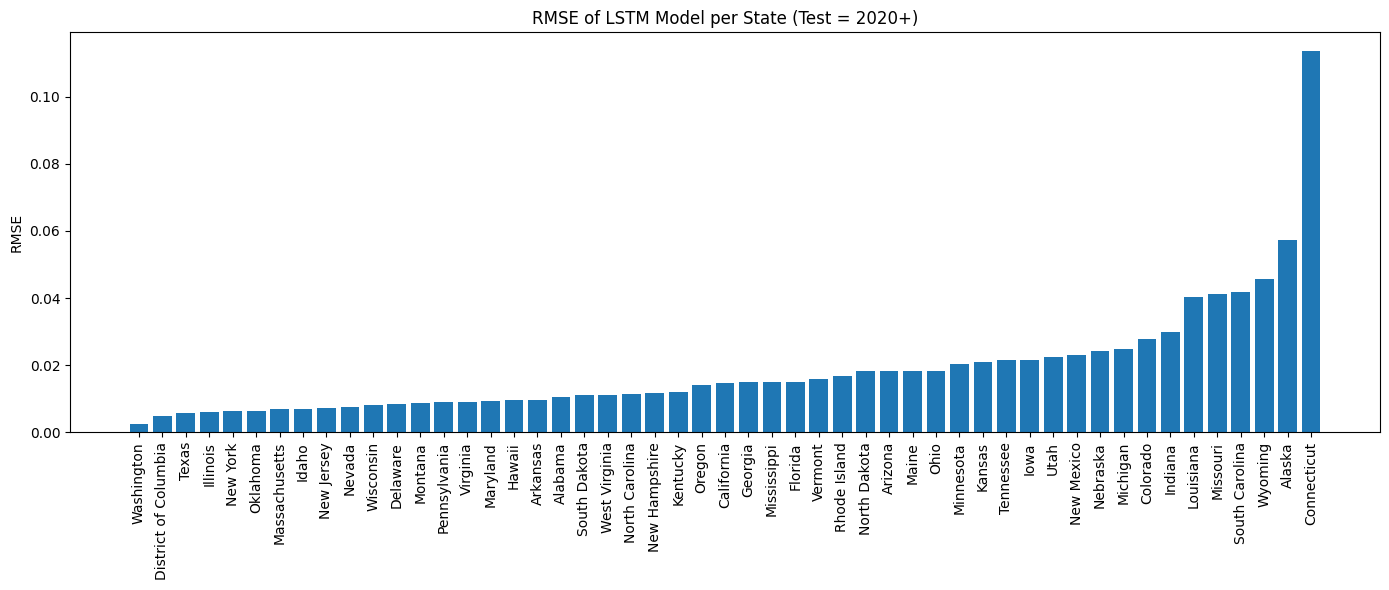

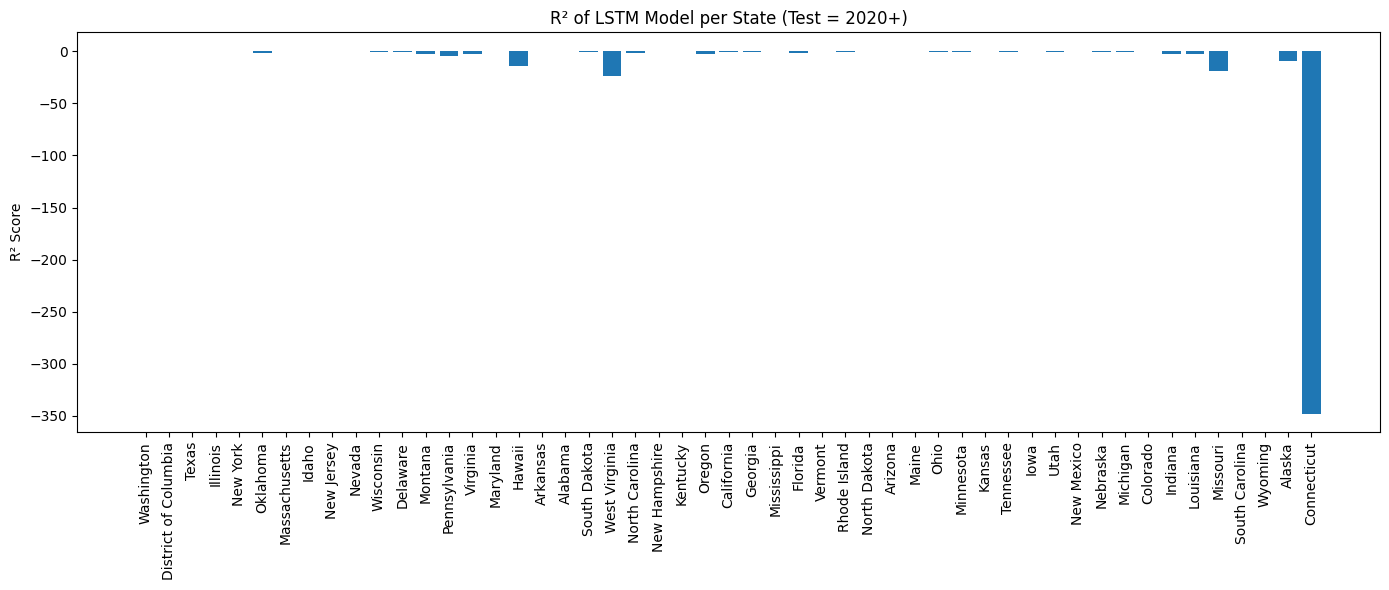

In [ ]:

# --- Parameters ---
window = 12
target_col = ["Unemployment Rate"]
input_features = ["Unemployment Rate", "median_income", "population", "lfp_rate", "initial_claims"]

rmse_dict = {}
r2_dict = {}

# --- Sequence Creator ---
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data.iloc[i:i+window][input_features].values)
        y.append(data.iloc[i+window][target_col].values[0])
    return np.array(X), np.array(y)

# --- Scaling Helper ---
def scale_data(df_train, df_test):
    df_train = df_train.drop(columns=['state', 'month'], errors='ignore')
    df_test = df_test.drop(columns=['state', 'month'], errors='ignore')

    imputer = SimpleImputer()
    df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
    df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

    scaler = MinMaxScaler()
    df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train_imputed), columns=df_train.columns)
    df_test_scaled = pd.DataFrame(scaler.transform(df_test_imputed), columns=df_test.columns)

    return df_train_scaled.reset_index(drop=True), df_test_scaled.reset_index(drop=True), scaler, imputer

# --- LSTM Model Builder ---
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Load Data ---
df = pd.read_csv("Tony_data/merged_data.csv", parse_dates=["month"])
df = df.sort_values(["state", "month"])

# --- Train LSTM for each state ---
for state in df['state'].unique():
    try:
        df_state = df[df['state'] == state].copy().sort_values("month").reset_index(drop=True)

        # Split by date
        df_train = df_state[df_state['month'] < '2020-01-01'].copy()
        df_test = df_state[df_state['month'] >= '2020-01-01'].copy()

        if len(df_train) <= window or len(df_test) == 0:
            raise ValueError("Not enough data before or after 2020")

        # Scale train and test separately
        df_train_scaled, df_test_scaled, scaler, imputer = scale_data(df_train, df_test)

        # Combine for sequence creation
        df_all = pd.concat([df_train_scaled, df_test_scaled]).reset_index(drop=True)
        X_all, y_all = create_sequences(df_all, window)

        # Determine split point after windowing
        train_size = len(df_train_scaled) - window
        X_train, y_train = X_all[:train_size], y_all[:train_size]
        X_test, y_test = X_all[train_size:], y_all[train_size:]

        # Build & train model
        model = build_lstm_model(input_shape=(window, len(input_features)))
        early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        model.fit(X_train, y_train, validation_split = 0.,
                  epochs=500, batch_size=16, verbose=0, callbacks=[early_stop])

        # Predict & evaluate
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        rmse_dict[state] = rmse
        r2_dict[state] = r2

        print(f"{state}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

    except Exception as e:
        print(f"Error in {state}: {e}")

# --- Plot Results ---
states_sorted = sorted(rmse_dict, key=rmse_dict.get)

# RMSE Plot
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [rmse_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("RMSE of LSTM Model per State (Test = 2020+)")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# R² Plot
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [r2_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("R² of LSTM Model per State (Test = 2020+)")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


In [6]:
X_all.shape

(444, 12, 4)

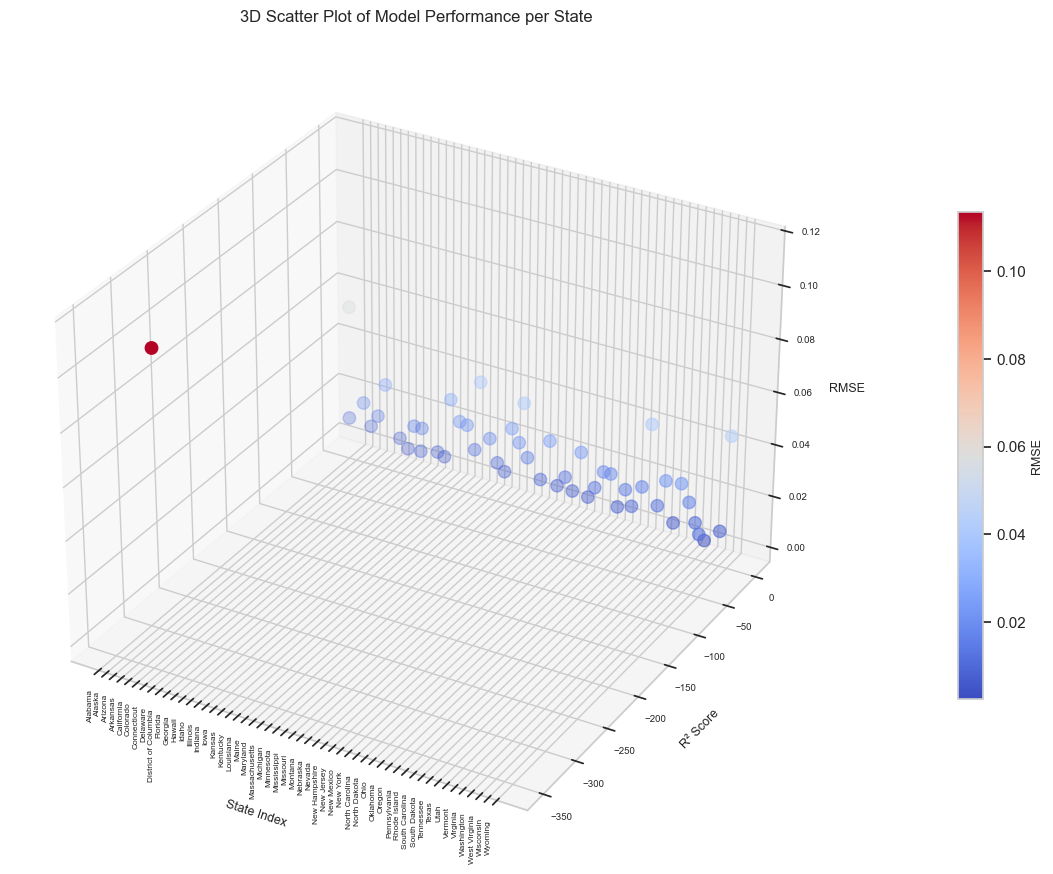

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# --- Create 3D figure ---
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# --- Data ---
states = list(rmse_dict.keys())
xs = np.arange(len(states))
ys = [r2_dict[s] for s in states]
zs = [rmse_dict[s] for s in states]

# --- 3D scatter plot ---
sc = ax.scatter(xs, ys, zs, c=zs, cmap='coolwarm', s=80, depthshade=True)

# --- Tick settings ---
ax.set_xticks(xs)
ax.set_xticklabels(states, rotation=90, fontsize=6, ha='center')
ax.tick_params(axis='x', labelsize=6, pad=2)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)

# --- Axis labels (shift x-label downward using labelpad) ---
ax.set_xlabel('State Index', fontsize=9, labelpad=20)
ax.set_ylabel('R² Score', fontsize=9, labelpad=10)
ax.set_zlabel('RMSE', fontsize=9, labelpad=10)

# --- Title and colorbar ---
ax.set_title('3D Scatter Plot of Model Performance per State', fontsize=12, pad=20)
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('RMSE', fontsize=9)
plt.savefig("high_res_plot.png", dpi=1000)
plt.tight_layout()
plt.show()


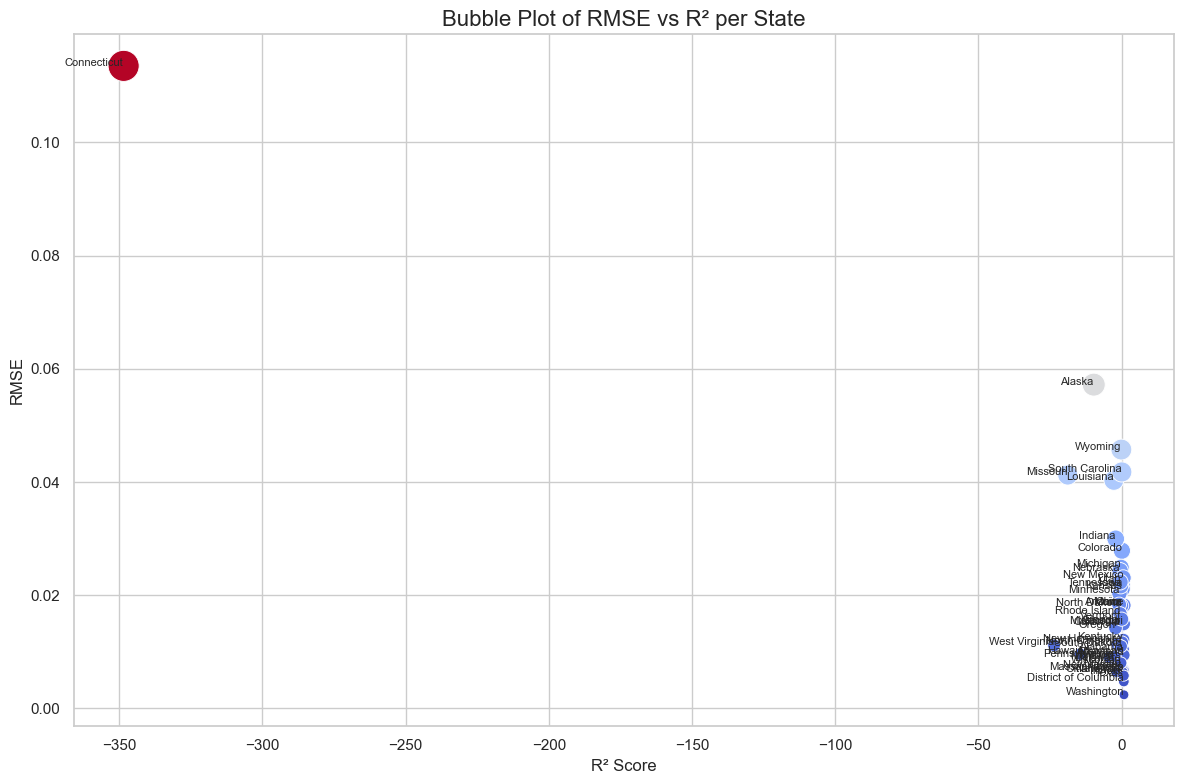

In [22]:
df_perf = pd.DataFrame({
    'state': list(rmse_dict.keys()),
    'RMSE': list(rmse_dict.values()),
    'R2': [r2_dict.get(s, np.nan) for s in rmse_dict.keys()]
}).dropna()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
bubble = sns.scatterplot(
    data=df_perf,
    x="R2", y="RMSE", size="RMSE", hue="RMSE", sizes=(50, 500),
    palette="coolwarm", legend=False
)
for i in range(df_perf.shape[0]):
    plt.text(df_perf["R2"].iloc[i], df_perf["RMSE"].iloc[i], df_perf["state"].iloc[i],
             fontsize=8, ha='right')

plt.title("Bubble Plot of RMSE vs R² per State", fontsize=16)
plt.xlabel("R² Score")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()
